# Genetic Algorithm Implementation

In [22]:
import numpy as np, random, math, time
import matplotlib.pyplot as plt
from termcolor import colored

In [6]:
POPULATION_SIZE = 100

class Individual(object):
    def __init__(self, chromosome):
        self.chromosome = chromosome
        self.fitness = self.calc_fitness(self.chromosome)

    @classmethod
    def generate_sol(self):
        gene = random.randint(-10, 10)
        return gene

    @classmethod
    def create_gnome(self):
        return (self.generate_sol(), self.generate_sol())

    @classmethod
    def fct(self, a, b):
        return a**2 + b**2

    @classmethod
    def calc_fitness(self, chromosome):
        ans = self.fct(chromosome[0], chromosome[1])

        if ans == 0:
            return 99
        else:
            return abs(1/ans)

    def mate(self, obj):
        # chromosome for offspring
        child_chromosome = []
        for gp1, gp2 in zip(self.chromosome, obj.chromosome):

            prob = random.random()

            if prob < 0.45:
                child_chromosome.append(gp1)

            elif prob < 0.90:
                child_chromosome.append(gp2)

            else:
                child_chromosome.append(self.generate_sol())

        return Individual(child_chromosome)
        

In [7]:
def main():
    # generate random generation
    generation = 0
    population = []
    found = False

    for _ in range(POPULATION_SIZE):
        gnome = Individual.create_gnome()
        population.append(Individual(gnome))

    while not found:

        population = sorted(population, key=lambda x: x.fitness)
        population.reverse()

        if population[0].fitness > 2:
            found = True
            break

        new_generation = []

        s = int((10*POPULATION_SIZE)/100)
        new_generation.extend(population[:s])

        s = int((90*POPULATION_SIZE)/100)

        for _ in range(s):
            parent1 = random.choice(population[:50])
            parent2 = random.choice(population[:50])
            child = parent1.mate(parent2)
            new_generation.append(child)

        population = new_generation

        print(f"generation {generation} ==> solution : {population[0].chromosome},\t fitness : {population[0].fitness}")

        generation += 1

    print("_"*60)
    print(f"generation {generation}  ==> solution : {population[0].chromosome},\t fitness : {population[0].fitness}")


In [8]:
main()

generation 0 ==> solution : (-1, 1),	 fitness : 0.5
generation 1 ==> solution : [-1, 1],	 fitness : 0.5
generation 2 ==> solution : [0, 1],	 fitness : 1.0
____________________________________________________________
generation 3  ==> solution : [0, 0],	 fitness : 99


# create target string 

In [11]:
# create target string, starting from random string using Genetic Algorithm

# Number of individuals in each generation
POPULATION_SIZE = 100

# Valid genes
GENES = '''abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOP
QRSTUVWXYZ 1234567890, .-;:_!"#%&/()=?@${[]}'''

# Target string to be generated
TARGET = input("enter the Target String : ")

class Individual(object):
    '''
    Class representing individual in population
    '''

    def __init__(self, chromosome):
        self.chromosome = chromosome
        self.fitness = self.cal_fitness()

    @classmethod
    def mutated_genes(self):
        '''
        create random genes for mutation
        '''
        global GENES
        gene = random.choice(GENES)
        return gene

    @classmethod
    def create_gnome(self):
        '''
        create chromosome or string of genes
        '''
        global TARGET
        gnome_len = len(TARGET)
        return [self.mutated_genes() for _ in range(gnome_len)]

    def mate(self, par2): # crossover and mutation
        '''
        Perform mating and produce new offspring
        '''

        # chromosome for offspring
        child_chromosome = []
        for gp1, gp2 in zip(self.chromosome, par2.chromosome):

            # random probability
            prob = random.random()

            # if prob is less than 0.45, insert gene
            # from parent 1
            if prob < 0.45:
                child_chromosome.append(gp1)

            # if prob is between 0.45 and 0.90, insert
            # gene from parent 2
            elif prob < 0.90:
                child_chromosome.append(gp2)

            # otherwise insert random gene(mutate),
            # for maintaining diversity
            else:
                child_chromosome.append(self.mutated_genes())

        # create new Individual(offspring) using
        # generated chromosome for offspring
        return Individual(child_chromosome)

    def cal_fitness(self):
        '''
        Calculate fitness score, it is the number of characters in string which differ from target string.
        '''
        global TARGET
        fitness = 0
        for gs, gt in zip(self.chromosome, TARGET):
            if gs != gt:
                fitness += 1
        return fitness

# Driver code
def main():
    global POPULATION_SIZE

    # current generation
    generation = 1

    found = False
    population = []

    # create initial population
    for _ in range(POPULATION_SIZE):
        gnome = Individual.create_gnome()
        population.append(Individual(gnome))

    while not found:

        # sort the population in increasing order of fitness score
        population = sorted(population, key=lambda x: x.fitness)

        # if the individual having lowest fitness score ie.
        # 0 then we know that we have reached to the target
        # and break the loop
        if population[0].fitness <= 0:
            found = True
            break

        # Otherwise generate new offsprings for new generation
        new_generation = []

        # Perform Elitism, that mean 10% of fittest population
        # goes to the next generation
        s = int((10*POPULATION_SIZE)/100)
        new_generation.extend(population[:s])

        # From 50% of fittest population, Individuals
        # will mate to produce offspring
        s = int((90*POPULATION_SIZE)/100)
        # print(f"s = {s}")
        for _ in range(s):
            parent1 = random.choice(population[:50])
            parent2 = random.choice(population[:50])
            child = parent1.mate(parent2)
            new_generation.append(child)

        population = new_generation

        print("Generation: {}\t\tString: {}\t\tFitness: {}".format(generation, "".join(population[0].chromosome), population[0].fitness))

        generation += 1

    print("Generation: {}\t\tString: {}\t\tFitness: {}".format(generation, "".join(population[0].chromosome), population[0].fitness))

main()

enter the Target String :  Morocco


Generation: 1		String: $.;Uwc?		Fitness: 6
Generation: 2		String: $.;Uwc?		Fitness: 6
Generation: 3		String: Mmw;#/o		Fitness: 5
Generation: 4		String: Mmw;#/o		Fitness: 5
Generation: 5		String: M:;;wco		Fitness: 4
Generation: 6		String: MErSoco		Fitness: 3
Generation: 7		String: MErSoco		Fitness: 3
Generation: 8		String: MErSoco		Fitness: 3
Generation: 9		String: MErSoco		Fitness: 3
Generation: 10		String: MErSoco		Fitness: 3
Generation: 11		String: MErSoco		Fitness: 3
Generation: 12		String: Mor,oco		Fitness: 2
Generation: 13		String: Mor,oco		Fitness: 2
Generation: 14		String: Mor,oco		Fitness: 2
Generation: 15		String: Mor,oco		Fitness: 2
Generation: 16		String: Mor,oco		Fitness: 2
Generation: 17		String: Mor,oco		Fitness: 2
Generation: 18		String: MorMcco		Fitness: 1
Generation: 19		String: MorMcco		Fitness: 1
Generation: 20		String: MorMcco		Fitness: 1
Generation: 21		String: MorMcco		Fitness: 1
Generation: 22		String: MorMcco		Fitness: 1
Generation: 23		String: MorMcco		Fitness:

# Genetic Algorithm for Rosenbrock function

=> Enter the population size:  160
=> Enter the crossover rate:  0.9
=> Enter the mutation rate:  0.1
=> Enter the vector length:  10
=> Enter the max iterations:  300


--------------------------------------------------------------------------------------------------------------
Generation: 300 || Vector: 1.233, 0.965, 0.941, 0.931, 0.907, 0.895, 0.843, 0.735, 0.563, 0.321 || Fitness: -1.597
=> Execution time: 1.30s
--------------------------------------------------------------------------------------------------------------


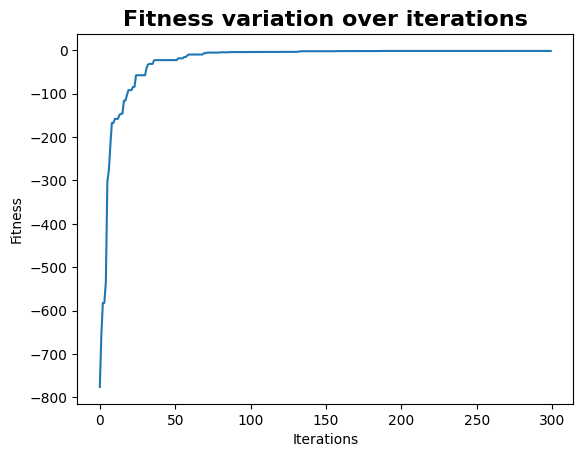

In [24]:
# Define the Rosenbrock function
def rosenbrock(vector):
    return sum(100 * (vector[i+1] - vector[i]**2)**2 + (1 - vector[i])**2 for i in range(len(vector) - 1))

# Parameters
POPULATION_SIZE = int(input("=> Enter the population size: "))
CROSSOVER_RATE = float(input("=> Enter the crossover rate: "))
MUTATION_RATE = float(input("=> Enter the mutation rate: "))
VECTOR_LENGTH = int(input("=> Enter the vector length: "))
MAX_ITERATIONS= int(input("=> Enter the max iterations: "))

# Utility functions
def vec(vector):
    return ', '.join(f"{v:.3f}" for v in vector)

def calc_fitness(population):
    for chromosome in population:
        chromosome.fitness = chromosome.cal_fitness()

# Chromosome Class
class Individual:
    def __init__(self, vector):
        self.vector = vector
        self.fitness = self.cal_fitness()

    def __str__(self):
        return f"Vector: {vec(self.vector)} || Fitness: {self.fitness:.3f}"

    @classmethod
    def mutated_bits(cls):
        return random.uniform(-2.048, 2.048)  # Typical range for Rosenbrock

    @classmethod
    def create_vector(cls):
        return [cls.mutated_bits() for _ in range(VECTOR_LENGTH)]

    def cal_fitness(self):
        return -rosenbrock(self.vector)  # We minimize the Rosenbrock function, hence the negative sign

# Initialize population
def initialisation():
    population = []
    for _ in range(POPULATION_SIZE):
        gnome = Individual.create_vector()
        population.append(Individual(gnome))
    return population

# Selection function
def roulette_wheel_selection(chromosomes):
    max_fitness = sum(chromosome.fitness for chromosome in chromosomes)
    pick = random.uniform(0, max_fitness)
    current = 0
    for chromosome in chromosomes:
        current += chromosome.fitness
        if current > pick:
            return chromosome
    return chromosomes[-1]  # In case the pick fails, return the last chromosome

# Crossover function
def uniform_crossover(parent1, parent2):
    if parent1 is None or parent2 is None:
        return parent1, parent2
    
    parent1, parent2 = parent1.vector, parent2.vector
    if random.random() < CROSSOVER_RATE:
        mask = [random.choice([True, False]) for _ in range(len(parent1))]
        child1 = [gene1 if use_gene else gene2 for gene1, gene2, use_gene in zip(parent1, parent2, mask)]
        child2 = [gene2 if use_gene else gene1 for gene1, gene2, use_gene in zip(parent1, parent2, mask)]
        return Individual(child1), Individual(child2)
    return Individual(parent1), Individual(parent2)

# Mutation function
def mutation(chromosome):
    if random.random() < MUTATION_RATE:
        i = random.randint(0, VECTOR_LENGTH - 1)
        chromosome.vector[i] = Individual.mutated_bits()
    return chromosome

# Main driver
def main():
    generation = 0
    found = False
    current_time = time.time()
    best_fitnesses = []

    # Create initial population
    population = initialisation()

    while MAX_ITERATIONS > generation:
        calc_fitness(population)
        population = sorted(population, key=lambda x: x.fitness, reverse=True)
        best_fitnesses.append(population[0].fitness)

        if population[0].fitness >= -1e-3:  # Convergence criteria
            found = True
            break

        new_generation = []

        # Produce 90% of the new population
        s = int((90 * POPULATION_SIZE) / 100) / 2
        for _ in range(int(s)):
            parent1 = roulette_wheel_selection(population)
            parent2 = roulette_wheel_selection(population)
            child1, child2 = uniform_crossover(parent1, parent2)
            child1 = mutation(child1)
            child2 = mutation(child2)
            new_generation.append(child1)
            new_generation.append(child2)

        # Carry over the top 10% of the population
        s = int((10 * POPULATION_SIZE) / 100)
        new_generation.extend(population[:s])
        population = new_generation

        generation += 1

    print('-' * 110)
    print(colored(f"Generation: {generation} || {population[0]}", color='green'))
    execution_time = time.time() - current_time
    print(f"=> Execution time: {execution_time:.2f}s")
    print('-' * 110)
    plt.plot(list(range(generation)), best_fitnesses)
    plt.xlabel('Iterations')
    plt.ylabel('Fitness')
    plt.title("Fitness variation over iterations", size=16, fontweight='bold')
    plt.show()

if __name__ == "__main__":
    main()
